In [57]:
% matplotlib inline

In [58]:
import numpy as np
import matplotlib.pyplot as plt

Thompson sampling for MAB problem - Success/Failure
---

In [126]:
class betaThompson():
    """
    class to capture states during a thompson MAB sample algorithm
    with success/failure reward
    pick_bandit - picks a bandit given what is known about the dist
    update - update a bandit given a success/failure
    """
    def __init__(self,bandits=3):
        
        self.bandits = bandits
        
        ## initialise bandit distribution parameters
        self.dists = [[1,1] for x in range(bandits)]
        
        ## capture rv's and outputs at each iteration
        self.rv = []
        self.op = []
        
    def pick_bandit(self):
        
        # generate and log rvs for each distribution, and get best_rv
        rv_i = [
            np.random.beta(self.dists[x][1],self.dists[x][0]) 
            for x in range(self.bandits)
        ]
        self.rv.append(rv_i)
        return np.argmax(rv_i)
    
    def update(self,bandit_id,success_flag):
        self.op.append(success_flag)
        self.dists[bandit_id][success_flag] += 1


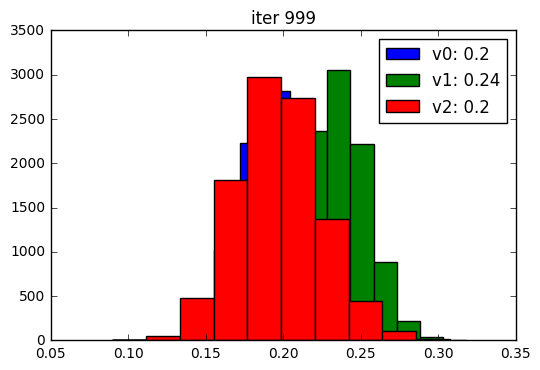

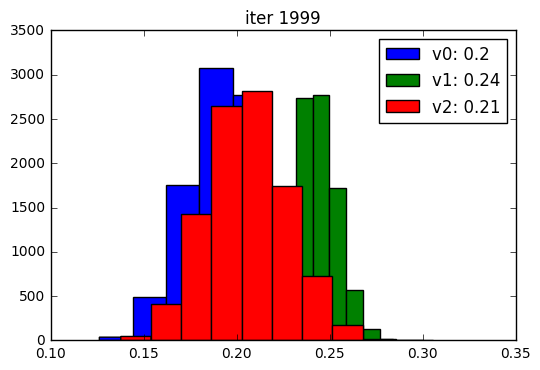

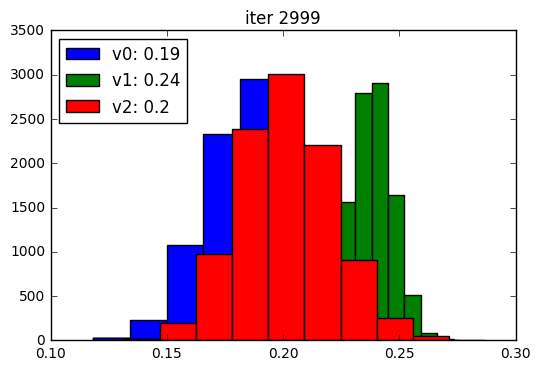

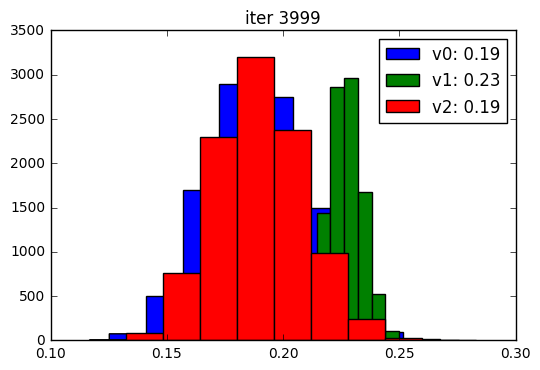

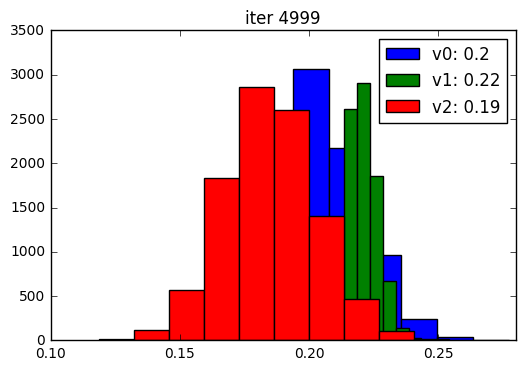

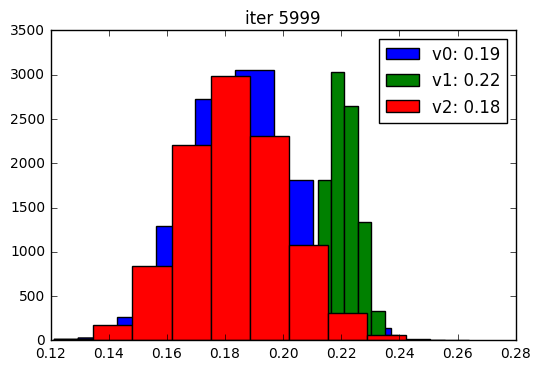

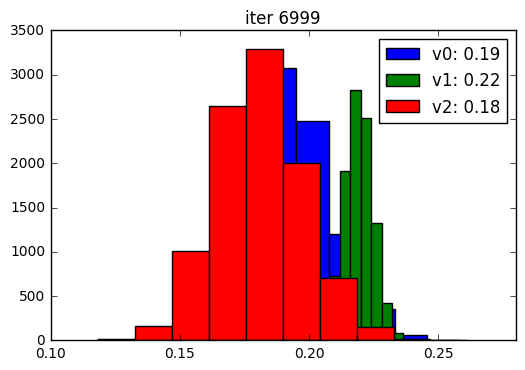

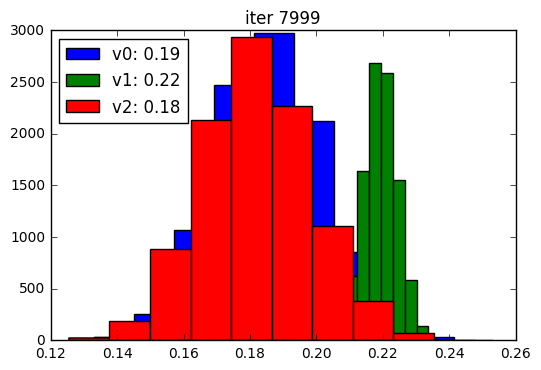

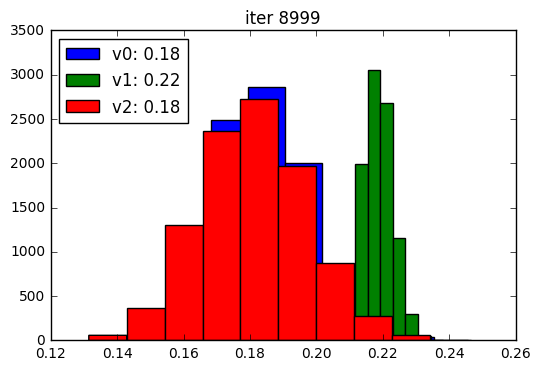

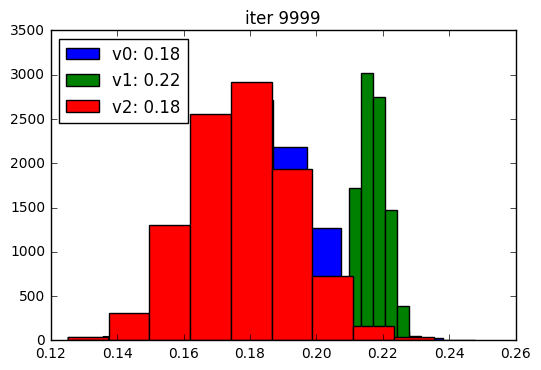

In [160]:
true_p = [0.20,0.21,0.19]

## initialize sampler
t = betaThompson(3)


for i in range(10000):
    
    ## pick bandit to assign
    b_i = t.pick_bandit()
    
    ## calculate success
    user = np.random.binomial(1,true_p[b_i])
    
    ## update bandit
    t.update(b_i,user)
    
    ## Plot distributions
    if i%1000==999:
        for j in range(3):
            r = np.random.beta(t.dists[j][1],t.dists[j][0],10000)
            plt.hist(
                r,
                label='v'+str(j)+': '+str(round(np.mean(r),2))
            )
        plt.legend(loc='best')
        plt.title('iter '+str(i))
        plt.show()

In [161]:
#How many times did it pick 1 in the first 2000 vs. last 2000?
print np.mean(map(lambda x: np.argmax(x)==1,t.rv)[:1000])
print np.mean(map(lambda x: np.argmax(x)==1,t.rv)[9000:])

0.507
0.97


/Users/apatterson/Envs/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()


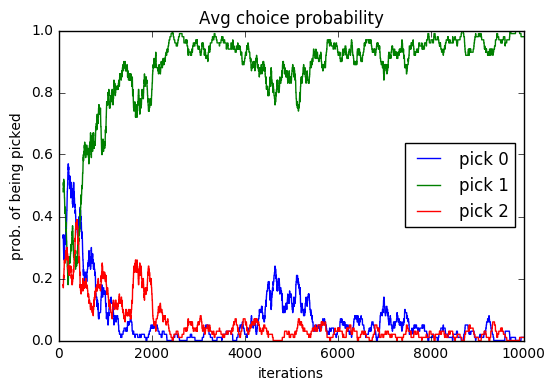

In [162]:
import pandas as pd

for i in range(3):
    pick = pd.rolling_mean(pd.Series(map(lambda x: np.argmax(x)==i,t.rv)),100)
    plt.plot(pick,label='pick '+str(i))
plt.title('Avg choice probability')
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('prob. of being picked')
plt.show()